In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.fil

In [2]:
iris = pd.read_csv('iris.csv')
iris.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
85,6.0,3.4,4.5,1.6,Versicolor
82,5.8,2.7,3.9,1.2,Versicolor
24,4.8,3.4,1.9,0.2,Setosa
37,4.9,3.6,1.4,0.1,Setosa


In [3]:
iris.shape

(150, 5)

`during model training, we use fit and during feature transformation we use fit_transform`
- 1. fit --> learn from data (learning)
`e.g., model.fit(x,y)`
- 2. .transform() --> uses the parameters learned in fit() to transform the data (applying on dataset)
- 3. .fit_transform() --> learning from the data and then transforming it

In [4]:
from sklearn.model_selection import train_test_split
x = iris.drop(iris[['variety']], axis=1)
y = iris['variety']

In [5]:
print(x.sample())
print(y.sample())

     sepal.length  sepal.width  petal.length  petal.width
129           7.2          3.0           5.8          1.6
14    Setosa
Name: variety, dtype: object


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=124, stratify=y)

In [7]:
print(xtrain.shape, ytrain.shape)

(120, 4) (120,)


In [8]:
le = LabelEncoder()
ytrain_t = le.fit_transform(ytrain)
ytrain_t

array([0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 1,
       1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0,
       2, 0, 0, 1, 0, 0, 2, 0, 0, 0])

In [9]:
ytest_t = le.transform(ytest) #if we use fit_transform here, encoding can change
ytest_t

array([0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

## Model Building

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
model = OneVsRestClassifier(LogisticRegression())

In [11]:
model.fit(xtrain, ytrain_t)

OneVsRestClassifier(estimator=LogisticRegression())

In [12]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [13]:
print(classification_report(ytrain_t, ypred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.90      0.92        40
           2       0.90      0.95      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [14]:
print(classification_report(ytest_t, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



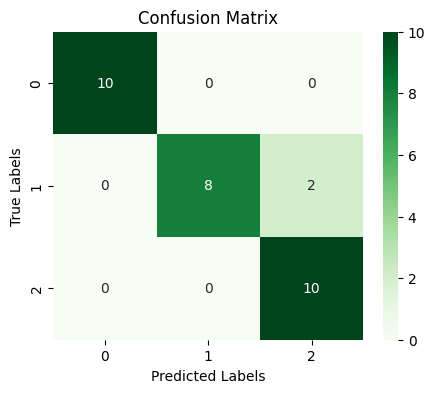

In [15]:
cm = confusion_matrix(ytest_t, ypred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# softmax
model1 = LogisticRegression(multi_class='multinomial')

In [19]:
model1.fit(xtrain, ytrain_t)

C:\Users\ID0346943\Downloads\jupyter-env\MiniConda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [20]:
ypred_train = model1.predict(xtrain)
ypred_test = model1.predict(xtest)

In [21]:
print(classification_report(ytrain_t, ypred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.95      0.97        40
           2       0.95      1.00      0.98        40

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [22]:
print(classification_report(ytest_t, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



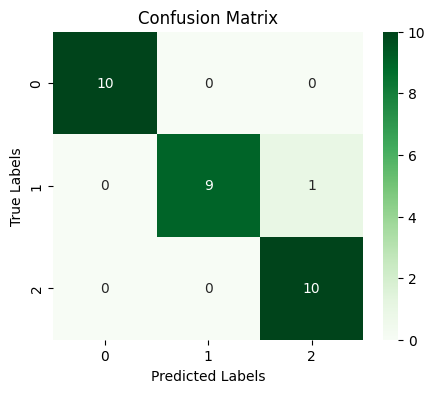

In [23]:
cm = confusion_matrix(ytest_t, ypred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# softmax
model1 = LogisticRegression(multi_class='ovr')

In [25]:
model1.fit(xtrain, ytrain_t)

C:\Users\ID0346943\Downloads\jupyter-env\MiniConda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [26]:
ypred_train = model1.predict(xtrain)
ypred_test = model1.predict(xtest)

In [27]:
print(classification_report(ytrain_t, ypred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.90      0.92        40
           2       0.90      0.95      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [28]:
print(classification_report(ytest_t, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



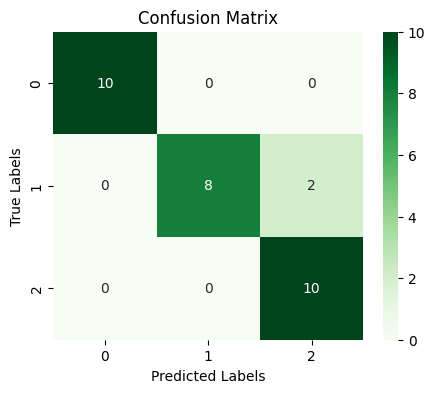

In [29]:
cm = confusion_matrix(ytest_t, ypred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()